In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget

from voxel import *
from mol_tools import *

import torch
import torch.nn as nn
import random
from tqdm import tqdm

from sklearn.model_selection import train_test_split, KFold

In [2]:
def drop_duplicates(df):
    df = df.drop_duplicates(subset="compound", keep="first")
    print("Number of molecules", df.shape[0])
    return df

In [10]:
df = pd.read_pickle("icsd_221_cp5_3_species.pkl")
df = drop_duplicates(df)
df

Number of molecules 1983


,auid,aurl,compound,composition,species,natoms,spacegroup,pearson_symbol,geometry,positions_fractional,positions_cartesian,enthalpy_atom,enthalpy_formation_atom
0,aflow:b778fabdb1b01db1,aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgAlO/T00...,Ag1Al1O3,"[1, 1, 3]","[Ag, Al, O]",5,221,cP5,"[3.7688035, 3.7688035, 3.7688035, 90.0, 90.0, ...","[[0.0, 0.0, 0.0], [0.5, 0.5, 0.5], [0.0, 0.5, ...","[[0.0, 0.0, 0.0], [1.8844, 1.8844, 1.8844], [0...",-5.04863,-0.775736
2,aflow:272cd0e74db84a51,aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgAsO/T00...,Ag1As1O3,"[1, 1, 3]","[Ag, As, O]",5,221,cP5,"[3.7951634, 3.7951634, 3.7951634, 90.0, 90.0, ...","[[0.0, 0.0, 0.0], [0.5, 0.5, 0.5], [0.0, 0.5, ...","[[0.0, 0.0, 0.0], [1.89758, 1.89758, 1.89758],...",-4.55519,-0.100528
4,aflow:7e6bdbc495310b44,aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgAuO/T00...,Ag1Au1O3,"[1, 1, 3]","[Ag, Au, O]",5,221,cP5,"[4.1003175, 4.1003175, 4.1003175, 90.0, 90.0, ...","[[0.0, 0.0, 0.0], [0.5, 0.5, 0.5], [0.0, 0.5, ...","[[0.0, 0.0, 0.0], [2.05016, 2.05016, 2.05016],...",-2.80408,1.37453
6,aflow:c0e1c25976bb4c75,aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgB_hO/T0...,Ag1B1O3,"[1, 1, 3]","[Ag, B, O]",5,221,cP5,"[3.484261, 3.484261, 3.484261, 90.0, 90.0, 90.0]","[[0.0, 0.0, 0.0], [0.5, 0.5, 0.5], [0.0, 0.5, ...","[[0.0, 0.0, 0.0], [1.74213, 1.74213, 1.74213],...",-4.55549,0.30734
8,aflow:3b79b8b28a5d5cc1,aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgBa_svO/...,Ag1Ba1O3,"[1, 1, 3]","[Ag, Ba, O]",5,221,cP5,"[4.7271734, 4.7271734, 4.7271734, 90.0, 90.0, ...","[[-0.0, 0.0, -0.0], [0.5, 0.5, 0.5], [-0.0, 0....","[[-0.0, 0.0, -0.0], [2.36359, 2.36359, 2.36359...",-3.52096,0.388015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,aflow:e243d024b0749ac0,aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/OXeZn/T00...,O3Xe1Zn1,"[3, 1, 1]","[O, Xe, Zn]",5,221,cP5,"[4.370543, 4.370543, 4.370543, 90.0, 90.0, 90.0]","[[0.0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.5, 0.5, ...","[[0.0, 2.18527, 2.18527], [2.18527, 0.0, 2.185...",-1.89960,None
3949,aflow:ae4a07b2d68c2933,aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/OXeZr_sv/...,O3Xe1Zr1,"[3, 1, 1]","[O, Xe, Zr]",5,221,cP5,"[4.322477, 4.322477, 4.322477, 90.0, 90.0, 90.0]","[[0.0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.5, 0.5, ...","[[-0.0, 2.16124, 2.16124], [2.16124, -0.0, 2.1...",-5.89112,-1.222
3951,aflow:0d9d3ce033a32aae,aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/OY_svZn/T...,O3Y1Zn1,"[3, 1, 1]","[O, Y, Zn]",5,221,cP5,"[4.3517566, 4.3517566, 4.3517566, 90.0, 90.0, ...","[[0.0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.5, 0.5, ...","[[0.0, 2.17588, 2.17588], [2.17588, 0.0, 2.175...",-5.57716,-1.07268
3953,aflow:627232532ed2fb40,aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/OY_svZr_s...,O3Y1Zr1,"[3, 1, 1]","[O, Y, Zr]",5,221,cP5,"[4.155165, 4.155165, 4.155165, 90.0, 90.0, 90.0]","[[0.0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.5, 0.5, ...","[[0.0, 2.07758, 2.07758], [2.07758, 0.0, 2.077...",-8.70129,-2.74124


In [4]:
def get_all_elements(df):
      return np.unique(np.hstack(np.array(df.species)))

In [5]:
def single_channel_reciprocal_data(mol, sigma, L, N):
    width = 2 * np.pi / L * N
    adj_width = width*np.sqrt(3)
    A = calc_basis(mol.geometry)
    coords = calc_cartesian_positions(A, mol.positions_fractional)
    mx, my, mz = get_mesh_coords(A, adj_width)
    B, G, SG = reciprocal_lattice_gaussian(A, coords, sigma, mx, my, mz)
    return mol.compound, (G, SG), mol.enthalpy_atom
    
def prepare_single_channel_data(df, sigma, L, N):
    
    names = []
    reciprocal_data = []
    ys = []
    for index, mol in df.iterrows():
        name, rd, y = single_channel_reciprocal_data(mol, sigma, L, N)

        names.append(name)
        reciprocal_data.append(rd)
        ys.append(y)
                    
    return names, reciprocal_data, ys
        

In [6]:
def multi_channel_reciprocal_data(mol, sigma, L, N, elements, reduce_data=False):
    width = 2 * np.pi / L * N
    adj_width = width*np.sqrt(3)
    
    A = calc_basis(mol.geometry)
    coords = calc_cartesian_positions(A, mol.positions_fractional)
    mx, my, mz = get_mesh_coords(A, adj_width)

    # atom coordinations are order according to composition and species    
    cs = np.cumsum(mol.composition)
    cs = np.insert(cs, 0, 0) # insert 0 at beginning

    rd = [] # collect G and SG for all elements
    for i, element in enumerate(mol.species):
        element_coords = coords[cs[i]:cs[i+1]] # extract coordinates corresponding to atoms of one element
        B, G, SG = reciprocal_lattice_gaussian(A, element_coords, sigma, mx, my, mz)
        
        if reduce_data:
            # only keep data that lies in relevant circle
            in_grid = np.linalg.norm(G,axis=0) <= adj_width/2 + 2*width/N # add 2 times voxel width to be sure (rounding)
            G = G[:,in_grid]
            SG = np.abs(SG[in_grid]) # also convert complex to real here to half the size
            
        j = np.where(elements == element)[0][0] # get channel for element
        rd.append((j, element, (G, SG)))
        
    return mol.compound, rd, mol.enthalpy_atom

def prepare_multi_channel_data(df, sigma, L, N, elements, reduce_data=False):
    names = []
    reciprocal_data = []
    ys = []
    counter = 0
    total = df.shape[0]
    
    for index, mol in df.iterrows():
        name, rd, y = multi_channel_reciprocal_data(mol, sigma, L, N, elements, reduce_data)
        
        names.append(name)
        reciprocal_data.append(rd)
        ys.append(y)
        
        counter += 1
        print(f"Calculated {counter}/{total} molecules.      ", end="\r")
        
    return names, reciprocal_data, ys

In [7]:
class MolLoader(object):
    def __init__(self, df, sigma, L, N, batch_size, nchannel=1, elements=None,
                 shuffle=False, rotate_randomly=False, device=torch.device('cpu'), reduce_data=False):
        
        if elements is None:
            names, reciprocal_data, ys = prepare_single_channel_data(df, sigma=sigma, L=L, N=N)
        else:
            names, reciprocal_data, ys = prepare_multi_channel_data(df, sigma=sigma, L=L, N=N,
                                                                    elements=elements, reduce_data=reduce_data)
            nchannel = len(elements)

        
        self.names = names
        self.reciprocal_data = reciprocal_data
        self.ys = ys
        self.batch_size = batch_size
        self.rotate_randomly = rotate_randomly
        self.device = device
        
        self.L = L
        self.N = N
        self.nchannel = nchannel
        
        self.shuffle = shuffle
        self.current = 0
        self.indices = np.arange(len(ys))
        self.N_data = len(self.indices)
        
        print(f"Initialised MolLoader with {self.N_data} molecules. sigma = {sigma}, L={self.L}, N={self.N}, nchannel={self.nchannel}, shuffle={self.shuffle}, rotate={self.rotate_randomly}, device={self.device}")
        
    def __iter__(self):
        return self
    
    def __next__(self):
         return self.next()

    def __len__(self):
        return int(np.ceil(self.N_data / self.batch_size))

    def next(self):
        N_data = self.N_data
        N = self.N # number of voxels
        L = self.L
        nchan = self.nchannel
        
        if self.current == 0 and self.shuffle:
            np.random.shuffle(self.indices)
        
        if self.current < N_data:
            n1 = self.current
            n2 = min(self.current + self.batch_size, N_data)
            
            x_names = []
            x = np.zeros((n2-n1, nchan, N, N, N), dtype="float32")
            y = np.zeros((n2-n1,1), dtype="float32")
            
            for i, j in enumerate(range(n1, n2)):
                data_index = self.indices[j] # supports shuffling
                
                y[i] = self.ys[data_index]
                x_names.append(self.names[data_index])
                
                R = np.eye(3)
                if self.rotate_randomly:
                    R = get_random_3D_rotation_matrix()
                
                if nchan == 1:
                    G, SG = self.reciprocal_data[data_index]
                    descriptor = make_voxel_grid(G, SG, L, N, rot=R)
                    x[i, 0, :, :, :] = descriptor
                else:
                    for j, element, (G, SG) in self.reciprocal_data[data_index]:
                        descriptor = make_voxel_grid(G, SG, L, N, rot=R)
                        x[i, j, :, :, :] = descriptor
                                           
            
            self.current = n2
            
            x = torch.from_numpy(x).to(self.device, non_blocking=True)
            y = torch.from_numpy(y).to(self.device, non_blocking=True)
            
            return (x_names, x, y)
        
        self.current = 0
        # print("Stop Iteration")
        raise StopIteration()
    

In [8]:
class LazyMolLoader(object):
    def __init__(self, df, sigma, L, N, batch_size, elements = None, nchannel=1,
                 shuffle=False, rotate_randomly=False, device=torch.device('cpu')):
        
        self.df = df
        self.elements = elements
        self.batch_size = batch_size
        self.rotate_randomly = rotate_randomly
        self.device = device
        
        self.L = L
        self.N = N
        self.sigma = sigma
        
        if elements is None:
            self.nchannel = nchannel
        else:
            self.nchannel = len(elements)
        
        self.shuffle = shuffle
        self.current = 0
        self.indices = np.arange(df.shape[0])
        self.N_data = len(self.indices)
        
        print(f"Initialised LazyMolLoader with {self.N_data} molecules. sigma={self.sigma}, L={self.L}, N={self.N}, nchannel={self.nchannel}, shuffle={self.shuffle}, rotate={self.rotate_randomly}, device={self.device}")
        
    def __iter__(self):
        return self
    
    def __next__(self):
         return self.next()

    def __len__(self):
        return int(np.ceil(self.N_data / self.batch_size))

    def next(self):
        N_data = self.N_data
        N = self.N # number of voxels
        L = self.L
        sigma = self.sigma
        nchan = self.nchannel
        
        if self.current == 0 and self.shuffle:
            np.random.shuffle(self.indices)
        
        if self.current < N_data:
            n1 = self.current
            n2 = min(self.current + self.batch_size, N_data)
            
            x_names = []
            x = np.zeros((n2-n1, nchan, N, N, N), dtype="float32")
            y = np.zeros((n2-n1,1), dtype="float32")
            
            for i, j in enumerate(range(n1, n2)):
                data_index = self.indices[j] # supports shuffling
                
                mol = self.df.iloc[data_index]
                
                R = np.eye(3)
                if self.rotate_randomly:
                    R = get_random_3D_rotation_matrix()
                
                if nchan == 1:
                    name, rd, y_i = single_channel_reciprocal_data(mol, sigma, L, N)
                    G, SG = rd
                    descriptor = make_voxel_grid(G, SG, L, N, rot=R)
                    x[i, 0, :, :, :] = descriptor
                    y[i] = y_i
                    x_names.append(name)
                
                else:
                    name, rd, y_i = multi_channel_reciprocal_data(mol, sigma, L, N, self.elements)
                    for j, element, (G, SG) in rd:
                        descriptor = make_voxel_grid(G, SG, L, N, rot=R)
                        x[i, j, :, :, :] = descriptor
                    y[i] = y_i
                    x_names.append(name)
                
                         
            self.current = n2
            
            x = torch.from_numpy(x).to(self.device, non_blocking=True)
            y = torch.from_numpy(y).to(self.device, non_blocking=True)
            
            return (x_names, x, y)
        
        self.current = 0
        # print("Stop Iteration")
        raise StopIteration()

In [9]:
names, reciprocal_data, ys = prepare_single_channel_data(df, sigma=0.1, L=12.8, N=32)
reciprocal_data[0]

(array([[-14.21112519, -14.21112519, -14.21112519, ...,  14.21112519,
          14.21112519,  14.21112519],
        [-14.21112519, -14.21112519, -14.21112519, ...,  14.21112519,
          14.21112519,  14.21112519],
        [-14.21112519, -12.63211128, -11.05309737, ...,  11.05309737,
          12.63211128,  14.21112519]]),
 array([0.00230204-1.61681006e-17j, 0.00094849-7.90097448e-18j,
        0.00343056-1.56888003e-17j, ..., 0.00343056+1.56888003e-17j,
        0.00094849+7.90097448e-18j, 0.00230204+1.61681006e-17j]))

In [10]:
%%time
ml = LazyMolLoader(df, sigma=0.1, L=12.8, N=32, batch_size=32, nchannel=1,
               shuffle=False, rotate_randomly=True)

for i, (names, x, y) in enumerate(ml):
    print(i, names, x.shape, y.shape)
    break

Initialised LazyMolLoader with 377 molecules. sigma=0.1, L=12.8, N=32, nchannel=1, shuffle=False, rotate=True, device=cpu
0 ['Ag1F3Zn1', 'Ag1Mn3N1', 'Ag1Nb1O3', 'Ag3I1S1', 'Al1Bi1O3', 'Al1C1Ce3', 'Al1C1Co3', 'Al1C1Dy3', 'Al1C1Er3', 'Al1C1Fe3', 'Al1C1Gd3', 'Al1C1Ho3', 'Al1C1La3', 'Al1C1Mn3', 'Al1C1Nd3', 'Al1C1Pr3', 'Al1C1Pt3', 'Al1C1Sc3', 'Al1C1Tb3', 'Al1C1Ti3', 'Al1C1Tm3', 'Al1C1Y3', 'Al1Ce1O3', 'Al1Ce3N1', 'Al1Dy3N1', 'Al1Er3N1', 'Al1Gd3N1', 'Al1Ho3N1', 'Al1La1O3', 'Al1La3N1', 'Al1Lu3N1', 'Al1N1Nd3'] torch.Size([32, 1, 32, 32, 32]) torch.Size([32, 1])
Wall time: 242 ms


In [21]:
df = pd.read_pickle("all_3_species_oxides.pkl")
df = drop_duplicates(df)
df

Number of molecules 5456


,auid,aurl,compound,composition,species,natoms,spacegroup,pearson_symbol,geometry,positions_fractional,positions_cartesian,enthalpy_atom,enthalpy_formation_atom
0,aflow:b281fdee92d2d2b2,aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgOOs_pv/...,Ag1O3Os1,"[1, 3, 1]","[Ag, O, Os]",5,221,cP5,"[3.9184369, 3.9184369, 3.9184369, 90.0, 90.0, ...","[[0.0, 0.0, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, ...","[[0.0, 0.0, 0.0], [0.0, 1.95922, 1.95922], [1....",-5.34058,0.427456
2,aflow:0783c5b47a9319f1,aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgOP/T000...,Ag1O3P1,"[1, 3, 1]","[Ag, O, P]",5,221,cP5,"[3.57933, 3.57933, 3.57933, 90.0, 90.0, 90.0]","[[0.0, 0.0, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, ...","[[0.0, 0.0, 0.0], [-0.0, 1.78966, 1.78966], [1...",-4.90593,-0.316921
4,aflow:701ef4b4f46ea7cd,aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgOPb_d/T...,Ag1O3Pb1,"[1, 3, 1]","[Ag, O, Pb]",5,221,cP5,"[4.2942064, 4.2942064, 4.2942064, 90.0, 90.0, ...","[[0.0, 0.0, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, ...","[[0.0, 0.0, 0.0], [0.0, 2.1471, 2.1471], [2.14...",-3.97006,0.295059
6,aflow:a7a77ee138e41496,aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgOPd_pv/...,Ag1O3Pd1,"[1, 3, 1]","[Ag, O, Pd]",5,221,cP5,"[3.9991958, 3.9991958, 3.9991958, 90.0, 90.0, ...","[[0.0, 0.0, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, ...","[[0.0, 0.0, 0.0], [0.0, 1.9996, 1.9996], [1.99...",-3.40735,1.19322
8,aflow:5fee8d04571dae6f,aflowlib.duke.edu:AFLOWDATA/LIB3_RAW/AgOPt/T00...,Ag1O3Pt1,"[1, 3, 1]","[Ag, O, Pt]",5,221,cP5,"[3.9809833, 3.9809833, 3.9809833, 90.0, 90.0, ...","[[0.0, 0.0, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, ...","[[0.0, 0.0, 0.0], [0.0, 1.99049, 1.99049], [1....",-3.71702,1.01812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11883,aflow:aaf7c3d68a5e61eb,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/BCT/O4Tm1...,O8Tm2V2,"[8, 2, 2]","[O, Tm, V]",12,141,tI24,"[5.926409, 5.926409, 5.926409, 106.3931, 106.3...","[[0.67778748, 0.49098905, 0.81320157], [0.6777...","[[2.22395, 3.55034, 1.11949], [1.3264, 0.0, 4....",-8.21900,None
11884,aflow:dd0ff61000b8e748,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/BCT/O4V1Y...,O8V2Y2,"[8, 2, 2]","[O, V, Y]",12,141,tI24,"[6.019827, 6.019827, 6.019827, 106.199, 106.19...","[[0.86631316, 0.80059798, 0.065715186], [0.234...","[[0.0, 0.47505, 5.09108], [3.61447, -0.47505, ...",-8.44561,None
11895,aflow:b9e0c6c998904bf1,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/BCT/O4V1Y...,O8V2Yb2,"[8, 2, 2]","[O, V, Yb]",12,141,tI24,"[5.961606, 5.961606, 5.961606, 106.3982, 106.3...","[[0.32709444, 0.51588908, 0.18879464], [0.3270...","[[1.34845, -0.0, 2.0722], [2.22276, 3.57122, -...",-7.03838,None
11898,aflow:36a24bb71d323a35,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/BCT/O4V2Z...,O8V4Zn2,"[8, 4, 2]","[O, V, Zn]",14,141,tI28,"[5.976299, 5.976299, 5.976299, 120.0156, 120.0...","[[0.25815325, 0.24220713, 0.98405389], [0.2581...","[[2.89217, 2.98745, -2.04451], [3.08272, 0.0, ...",-7.07798,None


In [22]:
elements = get_all_elements(df)
elements

array(['Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca',
       'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F',
       'Fe', 'Ga', 'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir',
       'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd',
       'Ni', 'O', 'Os', 'P', 'Pa', 'Pb', 'Pd', 'Pr', 'Pt', 'Pu', 'Rb',
       'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sn', 'Sr', 'Ta',
       'Tb', 'Tc', 'Te', 'Th', 'Ti', 'Tl', 'Tm', 'U', 'V', 'W', 'Xe', 'Y',
       'Yb', 'Zn', 'Zr'], dtype='<U2')

In [23]:
names, reciprocal_data, ys = prepare_multi_channel_data(df, sigma=0.1, L=12.8, N=32, elements=elements, reduce_data=True)
reciprocal_data[0]

[(0,
  'Ag',
  (array([[ -1.60349279,   0.        ,   0.        , ...,   0.        ,
             0.        ,   1.60349279],
          [-14.43143509, -14.43143509, -14.43143509, ...,  14.43143509,
            14.43143509,  14.43143509],
          [  0.        ,  -1.60349279,   0.        , ...,   0.        ,
             1.60349279,   0.        ]]),
   array([0.00579207, 0.00579207, 0.00586701, ..., 0.00586701, 0.00579207,
          0.00579207]))),
 (45,
  'O',
  (array([[ -1.60349279,   0.        ,   0.        , ...,   0.        ,
             0.        ,   1.60349279],
          [-14.43143509, -14.43143509, -14.43143509, ...,  14.43143509,
            14.43143509,  14.43143509],
          [  0.        ,  -1.60349279,   0.        , ...,   0.        ,
             1.60349279,   0.        ]]),
   array([0.00579207, 0.00579207, 0.00586701, ..., 0.00586701, 0.00579207,
          0.00579207]))),
 (46,
  'Os',
  (array([[ -1.60349279,   0.        ,   0.        , ...,   0.        ,
          

In [24]:
count = 0
for rd in reciprocal_data:
    for i, el, (x, y) in rd:
        count += x.shape[1]
count

226324530

In [13]:
%%time
ml = MolLoader(df, sigma=0.1,
               L=12.8, N=32, batch_size=32, elements = elements,
               shuffle=False, rotate_randomly=True)

for i, (names, x, y) in enumerate(ml):
    print(i, names, x.shape, y.shape)
    break

Initialised MolLoader with 377 molecules. sigma = 0.1, L=12.8, N=32, nchannel=76, shuffle=False, rotate=True, device=cpu
0 ['Ag1F3Zn1', 'Ag1Mn3N1', 'Ag1Nb1O3', 'Ag3I1S1', 'Al1Bi1O3', 'Al1C1Ce3', 'Al1C1Co3', 'Al1C1Dy3', 'Al1C1Er3', 'Al1C1Fe3', 'Al1C1Gd3', 'Al1C1Ho3', 'Al1C1La3', 'Al1C1Mn3', 'Al1C1Nd3', 'Al1C1Pr3', 'Al1C1Pt3', 'Al1C1Sc3', 'Al1C1Tb3', 'Al1C1Ti3', 'Al1C1Tm3', 'Al1C1Y3', 'Al1Ce1O3', 'Al1Ce3N1', 'Al1Dy3N1', 'Al1Er3N1', 'Al1Gd3N1', 'Al1Ho3N1', 'Al1La1O3', 'Al1La3N1', 'Al1Lu3N1', 'Al1N1Nd3'] torch.Size([32, 76, 32, 32, 32]) torch.Size([32, 1])
Wall time: 3.06 s


In [14]:
def seed_everything(seed=0):
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)

In [15]:
def count_parameters(model):
    s = 0
    for t in model.parameters():
        s += np.prod(t.shape)
    return s

In [16]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        # print("CUDA version:", torch.version.cuda)
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [17]:
class VoxelNet(nn.Module):
    def __init__(self, in_channels=1):
        super().__init__()
        # (N, C, D, H, W)
        self.conv1 = nn.Sequential(
            nn.Conv3d(in_channels, 16, 3, padding=0, stride=1),
            #nn.BatchNorm3d(16),
            nn.LeakyReLU(0.3),
            nn.MaxPool3d(2))
        
        self.conv2 = nn.Sequential(
            nn.Conv3d(16, 16, 3, padding=0, stride=1),
            nn.LeakyReLU(0.3),
            nn.MaxPool3d(2))
        
        self.conv3 = nn.Sequential(
            nn.Conv3d(16, 16, 3, padding=0, stride=1),
            nn.LeakyReLU(0.3))
        
        self.regressor = nn.Sequential(nn.Flatten(),
                                        nn.Linear(1024, 32),
                                        nn.LeakyReLU(0.3),
                                        nn.Linear(32, 8),
                                        nn.LeakyReLU(0.3),
                                        nn.Linear(8, 1))
    def forward(self, x):
        #print(x.shape)
        x = self.conv1(x)
        # print("conv1", x.shape)
        x = self.conv2(x)
        # print("conv2", x.shape)
        x = self.conv3(x)
        # print("conv3", x.shape)
        x = self.regressor(x)
        return x

In [18]:
@torch.no_grad()
def predict(model, loader):
    model.eval()
    ys = []
    y_hats = []
    
    for names, x, y in loader:
        y_hat = model(x)
        
        ys.append(y.cpu().numpy())
        y_hats.append(y_hat.cpu().numpy())

    ys = np.vstack(ys).reshape(-1)
    y_hats = np.vstack(y_hats).reshape(-1)
    return ys, y_hats

In [19]:
def predict_epochs(net, ml, epochs=1):
    ys = []
    y_hats = []
    for epoch in range(epochs): # for random rotations
        y, y_hat = predict(net, ml)
        ys.append(y)
        y_hats.append(y_hat)
    
    ys = np.hstack(ys)
    y_hats = np.hstack(y_hats)
        
    return ys, y_hats

In [20]:
def plot_predictions(ys, y_hats, alpha=0.2):
    mse = np.mean((ys - y_hats)**2)
    plt.scatter(ys, y_hats, alpha=alpha)
    plt.xlabel("measured")
    plt.ylabel("predicted")
    
    l = min(ys.min(), y_hats.min()) - 1
    u = max(ys.max(), y_hats.max()) + 1
    
    plt.plot([l,u], [l,u], c="red")
    plt.suptitle(f"MSE = {mse:.4f}")
    plt.show()

In [24]:
def fit(epochs, model, train_loader, val_loader, opt, lr, weight_decay, verbose=True):
    t0 = time.time()
    
    optimizer = opt(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    loss = nn.MSELoss()
    
    train_mse = []
    val_mse = []
    
    for epoch in range(epochs):
        ys = []
        y_hats = []
        
        # Training Phase 
        model.train()
        counter = 0
        total = len(train_loader)
        for names, x, y in train_loader:
            # print(names)
            y_hat = model(x)
            out = loss(y_hat, y)
            out.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            ys.append(y.cpu().numpy())
            y_hats.append(y_hat.cpu().detach().numpy())
            
            if verbose:
                counter += 1
                print(f"Epoch {epoch}: Batch {counter}/{total} processed.      ", end="\r")
            
        ys = np.vstack(ys).reshape(-1)
        y_hats = np.vstack(y_hats).reshape(-1)
        mean_loss = np.mean((ys - y_hats)**2)
        train_mse.append(mean_loss)
        
        model.eval()
        ys_val, y_hats_val = predict(model, val_loader)
        mean_loss_val = np.mean((ys_val - y_hats_val)**2)
        val_mse.append(mean_loss_val)
        
        if verbose:
            print(f"Epoch {epoch}: train loss {mean_loss} val loss {mean_loss_val}")
    
    
        
    t1 = time.time()
    
    print(f"Finished in {t1-t0:.4f}s.")

    plt.plot(train_mse, label="train")
    plt.plot(val_mse, label="validation")
    plt.legend()
    plt.show()

### Single Channel

In [ ]:
df = pd.read_pickle("icsd_221_cp5_3_species.pkl")
df = drop_duplicates(df)

seed_everything()
train_df, test_df = train_test_split(df, test_size=0.1)
print(train_df.shape, test_df.shape)

In [ ]:
names_train, reciprocal_data_train, ys_train = prepare_single_channel_data(train_df, sigma=0.1, L=12.8, N=32)
names_test, reciprocal_data_test, ys_test = prepare_single_channel_data(test_df, sigma=0.1, L=12.8, N=32)

In [ ]:
net = VoxelNet(1)
count_parameters(net)

In [ ]:
seed_everything()
device = get_default_device()

net = VoxelNet(1)
net = net.to(device)

ml_train = MolLoader(names_train, reciprocal_data_train, ys_train,
               L=12.8, N=32, batch_size=32, nchannel=1,
               shuffle=True, rotate_randomly=True, device=device)

ml_test = MolLoader(names_test, reciprocal_data_test, ys_test,
               L=12.8, N=32, batch_size=128, nchannel=1,
               shuffle=False, rotate_randomly=False, device=device)

fit(50, net, ml_train, ml_test, torch.optim.Adam, lr=0.001, weight_decay=0)

In [ ]:
ml_pred = MolLoader(names_train, reciprocal_data_train, ys_train,
                    L=12.8, N=32, batch_size=128, nchannel=1,
                    shuffle=False, rotate_randomly=False, device=device)
ys, y_hats = predict(net, ml_pred)
plot_predictions(ys, y_hats)

In [ ]:
ml_pred = MolLoader(names_test, reciprocal_data_test, ys_test,
                    L=12.8, N=32, batch_size=128, nchannel=1,
                    shuffle=False, rotate_randomly=False, device=device)
ys, y_hats = predict(net, ml_pred)
plot_predictions(ys, y_hats)

### Multi Channel

In [82]:
df = pd.read_pickle("icsd_221_cp5_3_species.pkl")
df = drop_duplicates(df)

seed_everything()
train_df, test_df = train_test_split(df, test_size=0.1)
print(train_df.shape, test_df.shape)

Number of molecules 377
(339, 13) (38, 13)


In [83]:
elements = get_all_elements(df)
elements

array(['Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca',
       'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F',
       'Fe', 'Ga', 'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir',
       'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd',
       'Ni', 'O', 'P', 'Pa', 'Pb', 'Pd', 'Pr', 'Pt', 'Pu', 'Rb', 'Rh',
       'Ru', 'S', 'Sb', 'Sc', 'Si', 'Sn', 'Sr', 'Ta', 'Tb', 'Tc', 'Th',
       'Ti', 'Tl', 'Tm', 'U', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr'],
      dtype='<U2')

In [84]:
nchannel = len(elements)
nchannel

76

In [85]:
net = VoxelNet(nchannel)
count_parameters(net)

79777

### ICSD

Initialised LazyMolLoader with 339 molecules. sigma=0.1, L=12.8, N=32, nchannel=76, shuffle=True, rotate=True, device=cuda
Initialised LazyMolLoader with 38 molecules. sigma=0.1, L=12.8, N=32, nchannel=76, shuffle=False, rotate=False, device=cuda
Epoch 0: train loss 27.649011611938477 val loss 27.423416137695312
Epoch 1: train loss 22.86301612854004 val loss 14.535316467285156
Epoch 2: train loss 7.457096099853516 val loss 6.862462997436523
Epoch 3: train loss 4.960904598236084 val loss 3.5831716060638428
Epoch 4: train loss 4.020195484161377 val loss 3.9473912715911865
Epoch 5: train loss 3.080455780029297 val loss 2.993619918823242
Epoch 6: train loss 2.961697578430176 val loss 2.655860424041748
Epoch 7: train loss 2.711576223373413 val loss 2.8405439853668213
Epoch 8: train loss 2.521676778793335 val loss 2.4884889125823975
Epoch 9: train loss 2.5905158519744873 val loss 2.435825824737549
Epoch 10: train loss 2.4018094539642334 val loss 2.590648889541626
Epoch 11: train loss 2.41493

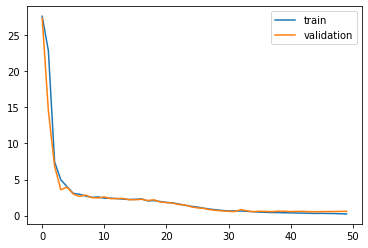

In [86]:
seed_everything()
device = get_default_device()

net = VoxelNet(nchannel)
net = net.to(device)

ml_train = LazyMolLoader(train_df, sigma=0.1, elements=elements,
               L=12.8, N=32, batch_size=64, nchannel=nchannel,
               shuffle=True, rotate_randomly=True, device=device)

ml_test = LazyMolLoader(test_df, sigma=0.1, elements=elements,
                   L=12.8, N=32, batch_size=len(names_test), nchannel=nchannel,
                   shuffle=False, rotate_randomly=False, device=device)

fit(50, net, ml_train, ml_test, torch.optim.Adam, lr=0.001, weight_decay=0)

#### Training Plots

Initialised MolLoader with 339 molecules. L=12.8, N=32, nchannel=76, shuffle=False, rotate=False, device=cuda


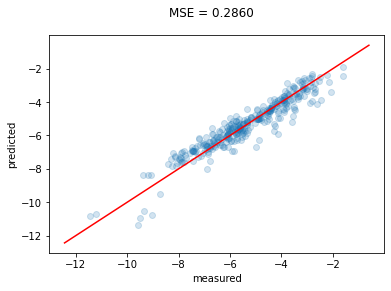

In [87]:
ml_pred = MolLoader(train_df, sigma=0.1, elements=elements,
                   L=12.8, N=32, batch_size=128, nchannel=nchannel,
                   shuffle=False, rotate_randomly=False, device=device)
ys, y_hats = predict(net, ml_pred)
plot_predictions(ys, y_hats)

Initialised MolLoader with 339 molecules. L=12.8, N=32, nchannel=76, shuffle=False, rotate=True, device=cuda


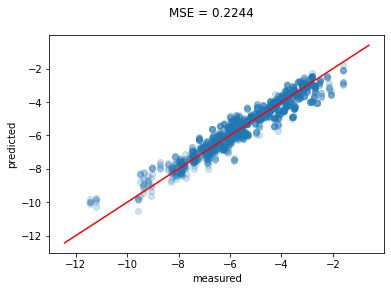

In [88]:
# rotations
seed_everything()
ml_pred = MolLoader(train_df, sigma=0.1, elements=elements,
                   L=12.8, N=32, batch_size=128, nchannel=nchannel,
                   shuffle=False, rotate_randomly=True, device=device)
ys, y_hats = predict_epochs(net, ml_pred, epochs=5)
plot_predictions(ys, y_hats)

#### Test Plots

Initialised MolLoader with 38 molecules. L=12.8, N=32, nchannel=76, shuffle=False, rotate=False, device=cuda


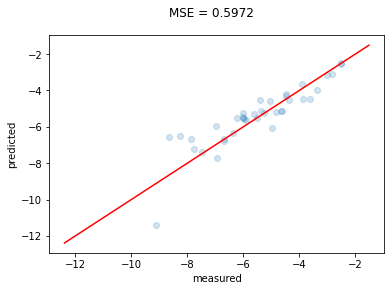

In [89]:
ml_pred = MolLoader(test_df, sigma=0.1, elements=elements,
                   L=12.8, N=32, batch_size=len(names_test), nchannel=nchannel,
                   shuffle=False, rotate_randomly=False, device=device)
ys, y_hats = predict(net, ml_pred)
plot_predictions(ys, y_hats)

Initialised MolLoader with 38 molecules. L=12.8, N=32, nchannel=76, shuffle=False, rotate=True, device=cuda


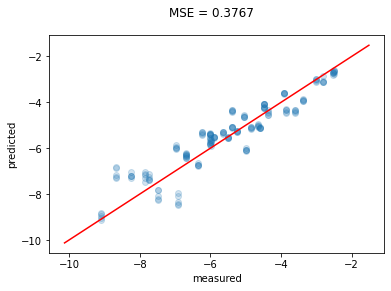

In [90]:
# rotations
seed_everything()
ml_pred = MolLoader(test_df, sigma=0.1, elements=elements,
                   L=12.8, N=32, batch_size=len(names_test), nchannel=nchannel,
                   shuffle=False, rotate_randomly=True, device=device)
ys, y_hats = predict_epochs(net, ml_pred, epochs=5)
plot_predictions(ys, y_hats)

### Param Grid Search

In [ ]:
from sklearn.model_selection import ParameterGrid

In [ ]:
df = pd.read_pickle("icsd_221_cp5_3_species.pkl")
df = drop_duplicates(df)

seed_everything()
train_df, test_df = train_test_split(df, test_size=0.1)
print(train_df.shape, test_df.shape)

In [ ]:
elements = get_all_elements(df)
nchannel = len(elements)
nchannel, elements

In [ ]:
param_grid = ParameterGrid({
    "sigma": [0.01, 0.05, 0.1, 0.5, 1.],
    "L": [5, 10, 12.8, 15, 20]
})

In [ ]:
sigma = 0.01
L = 12.8
names_train, reciprocal_data_train, ys_train = prepare_multi_channel_data(train_df, sigma=sigma, L=L, N=N, elements=elements)
names_test, reciprocal_data_test, ys_test = prepare_multi_channel_data(test_df, sigma=sigma, L=L, N=N, elements=elements)

In [ ]:
reciprocal_data_train[0][0][2][1].shape

In [ ]:
ml_train = MolLoader(names_train, reciprocal_data_train, ys_train,
               L=L, N=N, batch_size=64, nchannel=nchannel,
               shuffle=True, rotate_randomly=True, device=device)

In [ ]:
%%time
for (names, x, y) in ml_train:
    print(x.shape, y.shape)

In [ ]:
epochs = 50
N = 32

seed_everything()
device = get_default_device()

for params in param_grid:
    L = params["L"]
    sigma = params["sigma"]
    print(f"L = {L}, sigma = {sigma}")
    names_train, reciprocal_data_train, ys_train = prepare_multi_channel_data(train_df, sigma=sigma, L=L, N=N, elements=elements)
    names_test, reciprocal_data_test, ys_test = prepare_multi_channel_data(test_df, sigma=sigma, L=L, N=N, elements=elements)
    

    net = VoxelNet(nchannel)
    net = net.to(device)

    ml_train = MolLoader(names_train, reciprocal_data_train, ys_train,
                   L=L, N=N, batch_size=64, nchannel=nchannel,
                   shuffle=True, rotate_randomly=True, device=device)

    ml_test = MolLoader(names_test, reciprocal_data_test, ys_test,
                       L=L, N=N, batch_size=len(names_test), nchannel=nchannel,
                       shuffle=False, rotate_randomly=False, device=device)

    fit(epochs, net, ml_train, ml_test, torch.optim.Adam, lr=0.001, weight_decay=0, verbose=True)
    
    ml_pred = MolLoader(names_test, reciprocal_data_test, ys_test,
               L=L, N=N, batch_size=128, nchannel=nchannel,
               shuffle=False, rotate_randomly=True, device=device)
    ys, y_hats = predict_epochs(net, ml_pred, epochs=5)
    plot_predictions(ys, y_hats)

### All 221 cp5 Oxides

In [16]:
df = pd.read_pickle("all_221_cp5_3_species_oxides.pkl")
df = drop_duplicates(df)

Number of molecules 1983


In [17]:
elements = get_all_elements(df)
elements

array(['Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca',
       'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F',
       'Fe', 'Ga', 'Gd', 'Ge', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K',
       'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ni',
       'O', 'Os', 'P', 'Pa', 'Pb', 'Pd', 'Pr', 'Pt', 'Pu', 'Rb', 'Re',
       'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sn', 'Sr', 'Ta', 'Tb',
       'Tc', 'Te', 'Th', 'Ti', 'Tl', 'U', 'V', 'W', 'Xe', 'Y', 'Yb', 'Zn',
       'Zr'], dtype='<U2')

In [18]:
nchannel = len(elements)
nchannel

79

In [19]:
net = VoxelNet(nchannel)
count_parameters(net)

81073

(1784, 13) (199, 13)
Initialised MolLoader with 1784 molecules. L=12.8, N=32, nchannel=79, shuffle=True, rotate=True, device=cuda
Initialised MolLoader with 199 molecules. L=12.8, N=32, nchannel=79, shuffle=False, rotate=False, device=cuda
Epoch 0: train loss 14.604804992675781 val loss 3.556546211242676
Epoch 1: train loss 2.590949058532715 val loss 2.377230167388916
Epoch 2: train loss 2.2342586517333984 val loss 2.393793821334839
Epoch 3: train loss 2.1590535640716553 val loss 2.4100029468536377
Epoch 4: train loss 2.180845260620117 val loss 2.346633195877075
Epoch 5: train loss 2.173525333404541 val loss 2.371260404586792
Epoch 6: train loss 2.127218723297119 val loss 2.3700528144836426
Epoch 7: train loss 2.1224238872528076 val loss 2.367182970046997
Epoch 8: train loss 2.1395576000213623 val loss 2.331124782562256
Epoch 9: train loss 2.1020760536193848 val loss 2.3681702613830566
Epoch 10: train loss 2.128772497177124 val loss 2.2986319065093994
Epoch 11: train loss 2.11107802391

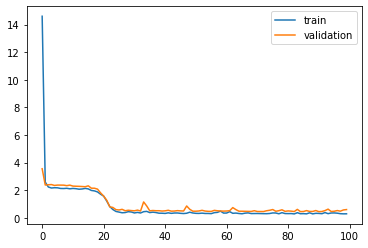

In [25]:
sigma = 0.5
L = 12.8
N = 32
epochs = 100
device = get_default_device()


seed_everything()
train_df, test_df = train_test_split(df, test_size=0.1)
print(train_df.shape, test_df.shape)
names_train, reciprocal_data_train, ys_train = prepare_multi_channel_data(train_df, sigma=sigma, L=L, N=N, elements=elements)
names_test, reciprocal_data_test, ys_test = prepare_multi_channel_data(test_df, sigma=sigma, L=L, N=N, elements=elements)

seed_everything()

net = VoxelNet(nchannel)
net = net.to(device)

ml_train = MolLoader(names_train, reciprocal_data_train, ys_train,
               L=L, N=N, batch_size=64, nchannel=nchannel,
               shuffle=True, rotate_randomly=True, device=device)

ml_test = MolLoader(names_test, reciprocal_data_test, ys_test,
               L=L, N=N, batch_size=128, nchannel=nchannel,
               shuffle=False, rotate_randomly=False, device=device)

fit(epochs, net, ml_train, ml_test, torch.optim.Adam, lr=0.001, weight_decay=0.01)

#### Train Plots

Initialised MolLoader with 1784 molecules. L=12.8, N=32, nchannel=79, shuffle=False, rotate=False, device=cuda


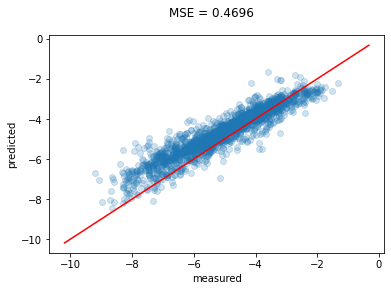

In [26]:
ml_pred = MolLoader(names_train, reciprocal_data_train, ys_train,
                   L=L, N=N, batch_size=128, nchannel=nchannel,
                   shuffle=False, rotate_randomly=False, device=device)
ys, y_hats = predict(net, ml_pred)
plot_predictions(ys, y_hats)

Initialised MolLoader with 1784 molecules. L=12.8, N=32, nchannel=79, shuffle=False, rotate=True, device=cuda


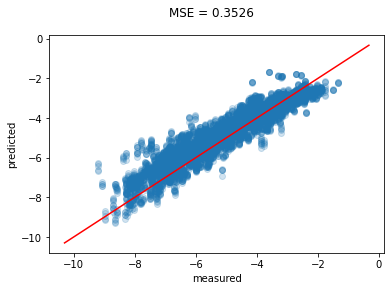

In [27]:
# rotations
seed_everything()
ml_pred = MolLoader(names_train, reciprocal_data_train, ys_train,
                   L=L, N=N, batch_size=128, nchannel=nchannel,
                   shuffle=False, rotate_randomly=True, device=device)
ys, y_hats = predict_epochs(net, ml_pred, epochs=5)
plot_predictions(ys, y_hats)

#### Test Plots

Initialised MolLoader with 199 molecules. L=12.8, N=32, nchannel=79, shuffle=False, rotate=False, device=cuda


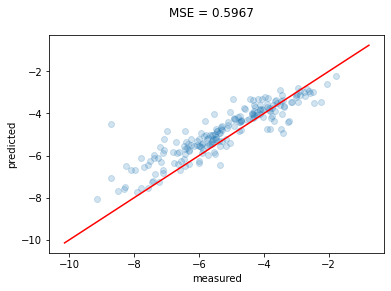

In [28]:
ml_pred = MolLoader(names_test, reciprocal_data_test, ys_test,
                   L=L, N=N, batch_size=len(names_test), nchannel=nchannel,
                   shuffle=False, rotate_randomly=False, device=device)
ys, y_hats = predict(net, ml_pred)
plot_predictions(ys, y_hats)

Initialised MolLoader with 199 molecules. L=12.8, N=32, nchannel=79, shuffle=False, rotate=True, device=cuda


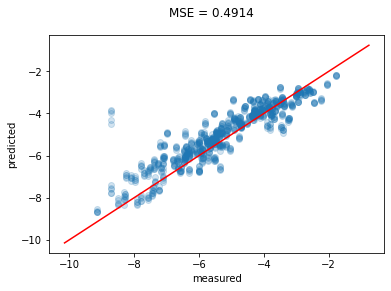

In [29]:
# rotations
seed_everything()
ml_pred = MolLoader(names_test, reciprocal_data_test, ys_test,
                   L=L, N=N, batch_size=len(names_test), nchannel=nchannel,
                   shuffle=False, rotate_randomly=True, device=device)
ys, y_hats = predict_epochs(net, ml_pred, epochs=5)
plot_predictions(ys, y_hats)

### Cross Validate

In [ ]:
df = pd.read_pickle("all_221_cp5_3_species_oxides.pkl")
df = drop_duplicates(df)

elements = get_all_elements(df)
nchannel = len(elements)

nchannel, elements

In [ ]:
sigma = 0.1
L = 12.8
N = 32
epochs = 50
device = get_default_device()

seed_everything()
all_ys = []
all_y_hats = []

for train_indices, test_indices in KFold(n_splits=5, shuffle=True).split(df):
    
    train_df = df.iloc[train_indices]
    test_df = df.iloc[test_indices]
    
    names_train, reciprocal_data_train, ys_train = prepare_multi_channel_data(train_df, sigma=sigma, L=L, N=N, elements=elements)
    names_test, reciprocal_data_test, ys_test = prepare_multi_channel_data(test_df, sigma=sigma, L=L, N=N, elements=elements)
    
    net = VoxelNet(nchannel)
    net = net.to(device)
    
    ml_train = MolLoader(names_train, reciprocal_data_train, ys_train,
               L=L, N=N, batch_size=64, nchannel=nchannel,
               shuffle=True, rotate_randomly=True, device=device)

    ml_test = MolLoader(names_test, reciprocal_data_test, ys_test,
               L=L, N=N, batch_size=128, nchannel=nchannel,
               shuffle=False, rotate_randomly=False, device=device)
    
    fit(epochs, net, ml_train, ml_test, torch.optim.Adam, lr=0.001, weight_decay=0)
    
    ml_pred = MolLoader(names_test, reciprocal_data_test, ys_test,
               L=L, N=N, batch_size=128, nchannel=nchannel,
               shuffle=False, rotate_randomly=True, device=device)
    ys, y_hats = predict_epochs(net, ml_pred, epochs=5)
    plot_predictions(ys, y_hats)
    
    all_ys.append(ys)
    all_y_hats.append(y_hats)

In [ ]:
# 0.2881
plot_predictions(np.hstack(all_ys), np.hstack(all_y_hats), alpha=0.01)

## All Oxides

In [25]:
df = pd.read_pickle("all_3_species_oxides.pkl")
df = drop_duplicates(df)

elements = get_all_elements(df)
nchannel = len(elements)

nchannel, elements

Number of molecules 5456


(81,
 array(['Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca',
        'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F',
        'Fe', 'Ga', 'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir',
        'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd',
        'Ni', 'O', 'Os', 'P', 'Pa', 'Pb', 'Pd', 'Pr', 'Pt', 'Pu', 'Rb',
        'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sn', 'Sr', 'Ta',
        'Tb', 'Tc', 'Te', 'Th', 'Ti', 'Tl', 'Tm', 'U', 'V', 'W', 'Xe', 'Y',
        'Yb', 'Zn', 'Zr'], dtype='<U2'))

(4910, 13) (546, 13)
Initialised LazyMolLoader with 4910 molecules. sigma=0.1, L=12.8, N=32, nchannel=81, shuffle=True, rotate=True, device=cuda
Initialised MolLoader with 546 molecules. sigma = 0.1, L=12.8, N=32, nchannel=81, shuffle=False, rotate=False, device=cuda
Epoch 0: train loss 8.705805778503418 val loss 2.3399240970611572
Epoch 1: train loss 1.8368452787399292 val loss 1.545914888381958
Epoch 2: train loss 0.9485858678817749 val loss 0.7285565137863159
Epoch 3: train loss 0.53594970703125 val loss 0.6391187310218811
Epoch 4: train loss 0.5007837414741516 val loss 0.6037955284118652
Epoch 5: train loss 0.45938101410865784 val loss 0.6865954995155334
Epoch 6: train loss 0.44529828429222107 val loss 0.5358626246452332
Epoch 7: train loss 0.4165996015071869 val loss 0.5241679549217224
Epoch 8: train loss 0.3987962007522583 val loss 0.5500786900520325
Epoch 9: train loss 0.4173346757888794 val loss 0.5911540985107422
Epoch 10: train loss 0.39930227398872375 val loss 0.487990945577

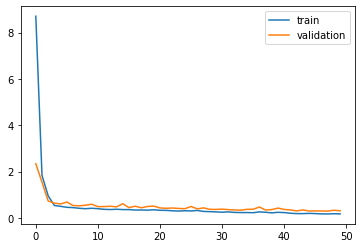

In [27]:
sigma = 0.1
L = 12.8
N = 32
epochs = 50
device = get_default_device()


seed_everything()
train_df, test_df = train_test_split(df, test_size=0.1)
print(train_df.shape, test_df.shape)

seed_everything()

net = VoxelNet(nchannel)
net = net.to(device)

ml_train = LazyMolLoader(train_df, sigma=sigma, elements=elements,
               L=L, N=N, batch_size=64, nchannel=nchannel,
               shuffle=True, rotate_randomly=True, device=device)

ml_test = MolLoader(test_df, sigma=sigma, elements=elements,
               L=L, N=N, batch_size=128, nchannel=nchannel,
               shuffle=False, rotate_randomly=False, device=device)

fit(epochs, net, ml_train, ml_test, torch.optim.Adam, lr=0.001, weight_decay=0)

Initialised LazyMolLoader with 4910 molecules. sigma=0.1, L=12.8, N=32, nchannel=81, shuffle=False, rotate=True, device=cuda


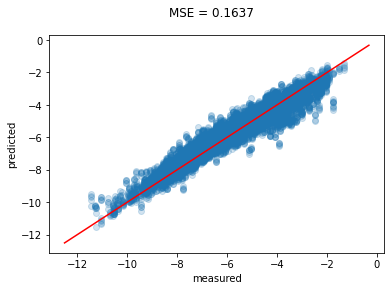

In [30]:
# rotations
seed_everything()
ml_pred = LazyMolLoader(train_df, sigma=sigma, elements=elements,
                   L=L, N=N, batch_size=128, nchannel=nchannel,
                   shuffle=False, rotate_randomly=True, device=device)
ys, y_hats = predict_epochs(net, ml_pred, epochs=5)
plot_predictions(ys, y_hats)

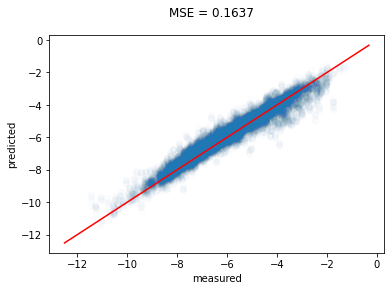

In [36]:
plot_predictions(ys, y_hats, alpha=0.01)

Initialised MolLoader with 546 molecules. sigma = 0.1, L=12.8, N=32, nchannel=81, shuffle=False, rotate=True, device=cuda


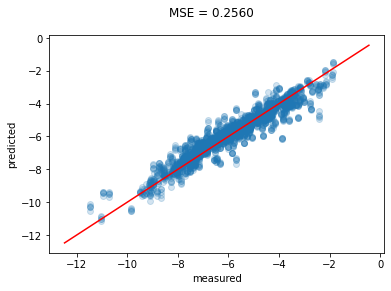

In [29]:
# rotations
seed_everything()
ml_pred = MolLoader(test_df, sigma=sigma, elements=elements,
                   L=L, N=N, batch_size=128, nchannel=nchannel,
                   shuffle=False, rotate_randomly=True, device=device)
ys, y_hats = predict_epochs(net, ml_pred, epochs=5)
plot_predictions(ys, y_hats)

In [ ]:
sigma = 0.1
L = 12.8
N = 32
epochs = 50
device = get_default_device()

seed_everything()
all_ys = []
all_y_hats = []

for train_indices, test_indices in KFold(n_splits=5, shuffle=True).split(df):
    
    train_df = df.iloc[train_indices]
    test_df = df.iloc[test_indices]
    
    names_train, reciprocal_data_train, ys_train = prepare_multi_channel_data(train_df, sigma=sigma, L=L, N=N, elements=elements)
    names_test, reciprocal_data_test, ys_test = prepare_multi_channel_data(test_df, sigma=sigma, L=L, N=N, elements=elements)
    
    net = VoxelNet(nchannel)
    net = net.to(device)
    
    ml_train = MolLoader(names_train, reciprocal_data_train, ys_train,
               L=L, N=N, batch_size=64, nchannel=nchannel,
               shuffle=True, rotate_randomly=True, device=device)

    ml_test = MolLoader(names_test, reciprocal_data_test, ys_test,
               L=L, N=N, batch_size=128, nchannel=nchannel,
               shuffle=False, rotate_randomly=False, device=device)
    
    fit(epochs, net, ml_train, ml_test, torch.optim.Adam, lr=0.001, weight_decay=0)
    
    ml_pred = MolLoader(names_test, reciprocal_data_test, ys_test,
               L=L, N=N, batch_size=128, nchannel=nchannel,
               shuffle=False, rotate_randomly=True, device=device)
    ys, y_hats = predict_epochs(net, ml_pred, epochs=5)
    plot_predictions(ys, y_hats)
    
    all_ys.append(ys)
    all_y_hats.append(y_hats)

In [ ]:
plot_predictions(np.hstack(all_ys), np.hstack(all_y_hats), alpha=0.01)

In [ ]:
# rotations
seed_everything()
ml_pred = LazyMolLoader(test_df, sigma=sigma, elements=elements
                   L=L, N=N, batch_size=len(names_test), nchannel=nchannel,
                   shuffle=False, rotate_randomly=True, device=device)
ys, y_hats = predict_epochs(net, ml_pred, epochs=5)
plot_predictions(ys, y_hats)

In [19]:
sigma = 0.1
L = 12.8
N = 32
seed_everything()
train_df, test_df = train_test_split(df, test_size=0.1)

In [20]:
names_train, reciprocal_data_train, ys_train = prepare_multi_channel_data(train_df, sigma=sigma, L=L, N=N, elements=elements)

KeyboardInterrupt: 

In [25]:
sum(df.composition.apply(lambda x: sum(x)) < 25)

4136